In [1]:
# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Import Data

In [3]:
data = pd.read_csv('Credit Card Fraud.csv')


In [ ]:
#Data Set Characteristics

In [4]:
data.head()
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
##Feature engineering and data preprocessing##

In [5]:
scaler = StandardScaler()
data['Amount_Scaled'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
##Checking Column Names & Data Types ##

In [6]:
print(data.columns)
print(data.dtypes)


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'Amount_Scaled'],
      dtype='object')
V1               float64
V2               float64
V3               float64
V4               float64
V5               float64
V6               float64
V7               float64
V8               float64
V9               float64
V10              float64
V11              float64
V12              float64
V13              float64
V14              float64
V15              float64
V16              float64
V17              float64
V18              float64
V19              float64
V20              float64
V21              float64
V22              float64
V23              float64
V24              float64
V25              float64
V26              float64
V27              float64
V28              float64
Class              int64
Amount_Scal

In [ ]:
##Visualisation of Columns & Data Types##

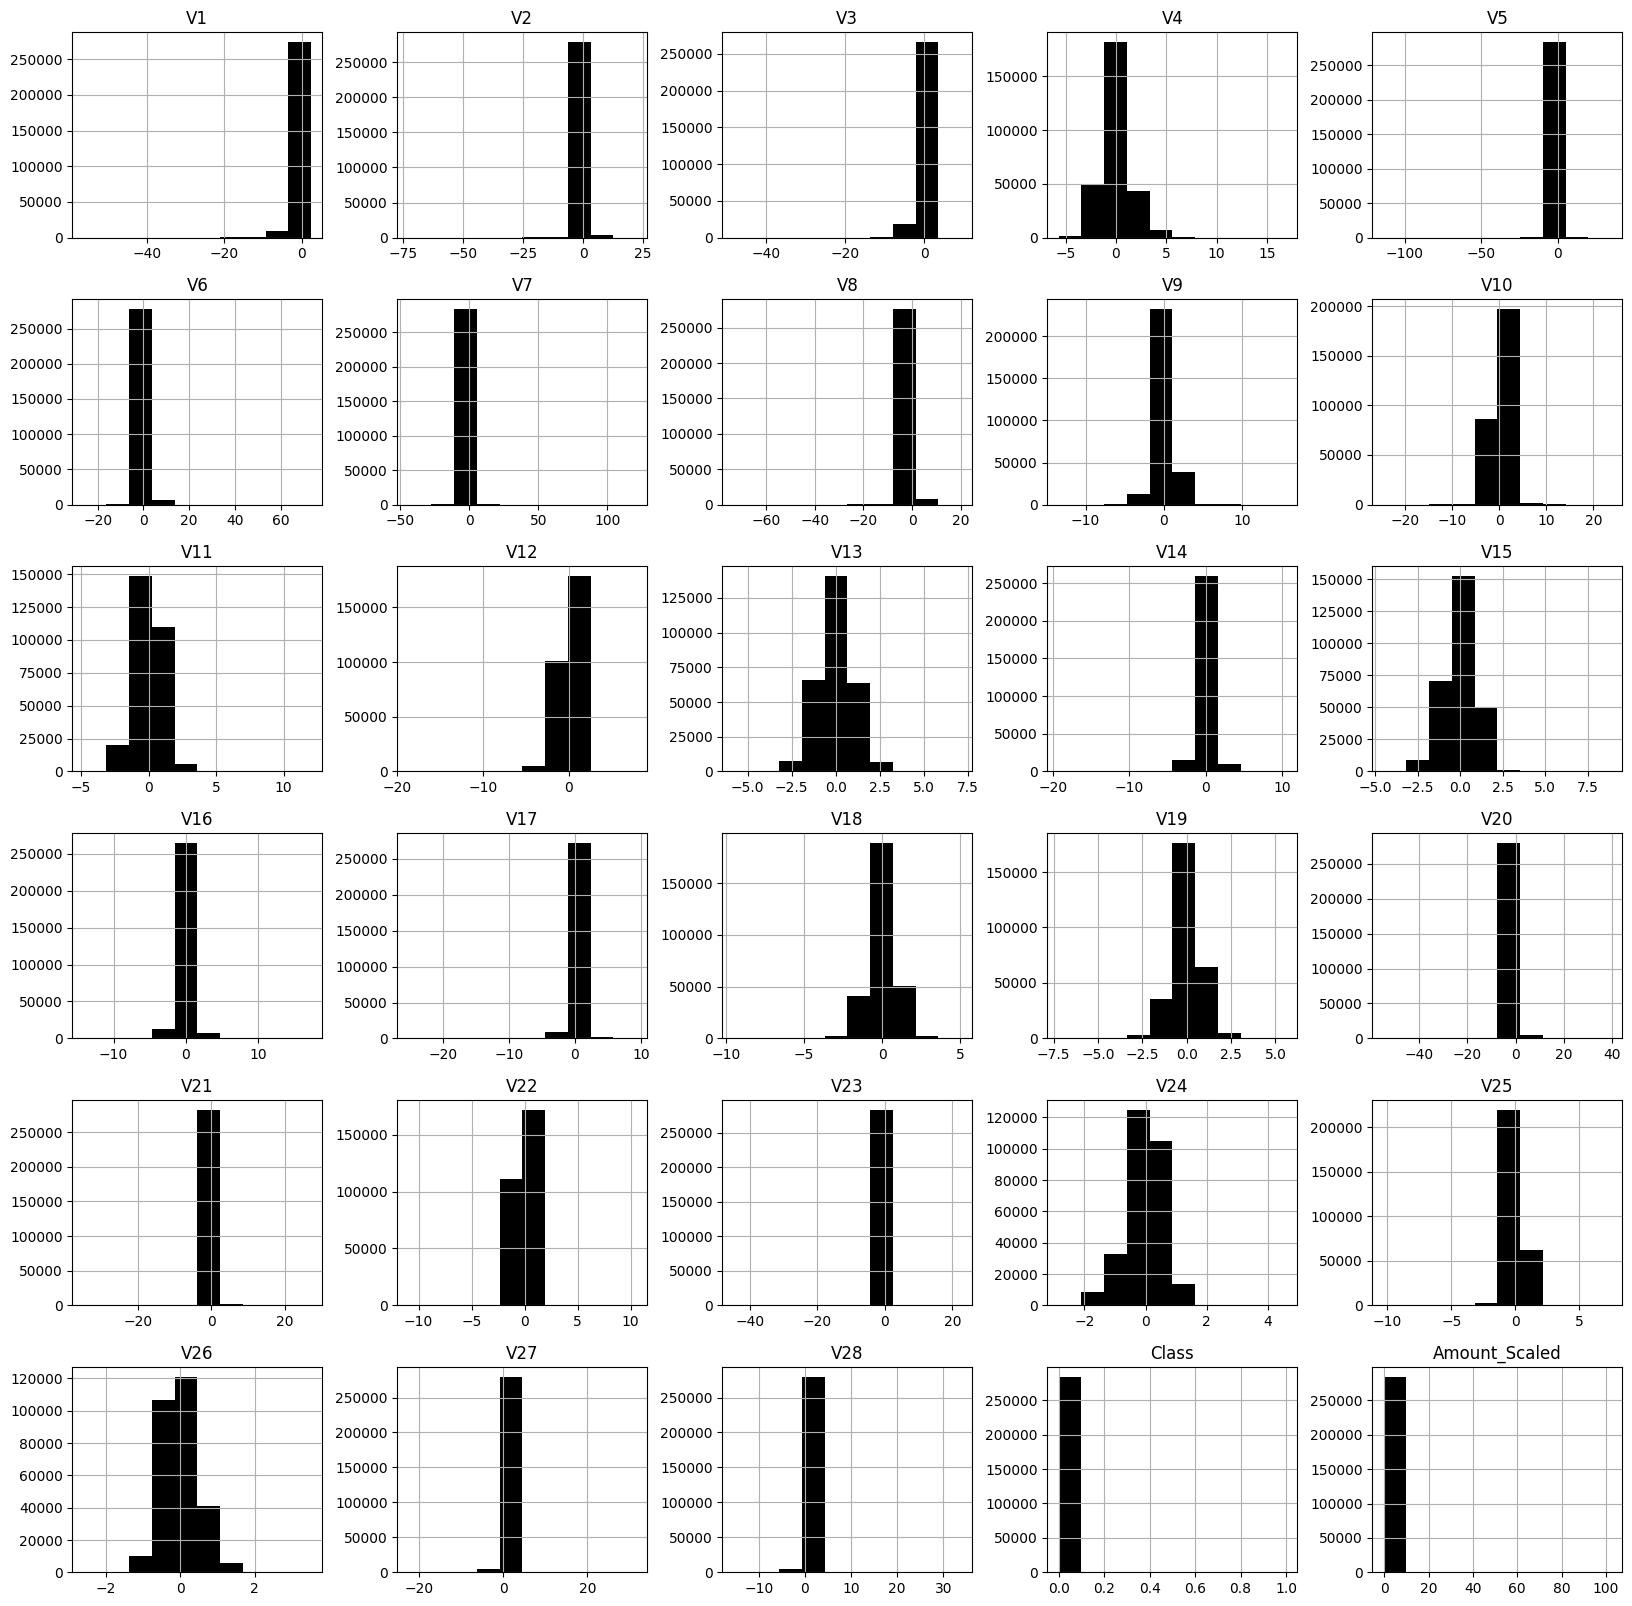

In [7]:
data.hist(figsize=(20,20),color='k')
plt.show()

In [ ]:
##Visualization of Class Feature Bifurcated in O for NON-Fraud & 1 For Fraud respectively##

<Axes: xlabel='Class'>

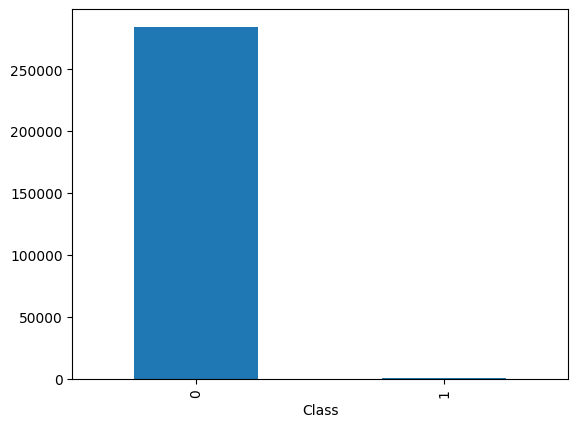

In [8]:
data['Class'].value_counts().plot(kind='bar')


In [ ]:
##Accuracy will be obviously quite high if any model is trained on the same data as the Count of Non fraud is high and Fraud transactions are quite less ie 1% approx is fraud transaction hence SMOTE is applied on the same to avoid overfitting of the data##


In [9]:
from imblearn.over_sampling import SMOTE

## Performing SMOTE as the data is imbalanced##
X = data.drop('Class', axis=1)  # Features
y = data['Class']  # Target variable

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Resample data using SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)


In [10]:
## After performing SMOTE getting the visuals of the same sample size is kept low as data points is quite high##

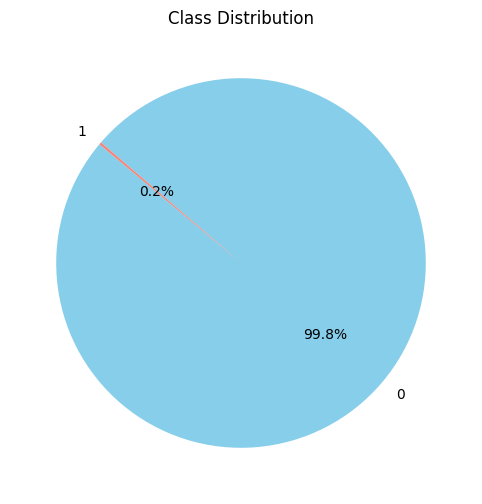

In [19]:
plt.figure(figsize=(8, 6))
sampled_data['Class'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=140)
plt.title('Class Distribution')
plt.ylabel('')
plt.show()


In [12]:
#Spliting the data


from sklearn.model_selection import train_test_split

# resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# X_train: Features for training
# X_test: Features for testing
# y_train: Target variable for training
# y_test: Target variable for testing


In [13]:
##Performing RandomForestClassifier##

from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [14]:
##Prediction of the model ##

from sklearn.metrics import classification_report, confusion_matrix

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

[[56738    12]
 [    0 56976]]


In [15]:
##Performing Logistic Regression Model##

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate the logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)  # max_iter is set to ensure convergence

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.98      0.95     56750
           1       0.97      0.92      0.95     56976

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

[[55354  1396]
 [ 4580 52396]]


In [16]:
##Classification Report:
##The classification report includes precision, recall, and F1-score for each class, along with their support (the number of true instances for each class).

Precision: The ratio of true positive predictions to the total predicted positives.

For class 0: 0.92 (92% of the predictions for class 0 were correct)
For class 1: 0.97 (97% of the predictions for class 1 were correct)
Recall: The ratio of true positive predictions to the total actual positives.

For class 0: 0.98 (98% of the actual class 0 instances were correctly predicted)
For class 1: 0.92 (92% of the actual class 1 instances were correctly predicted)
F1-Score: The harmonic mean of precision and recall, providing a balance between the two.

For class 0: 0.95
For class 1: 0.95
Support: The number of actual instances for each class.

For class 0: 56,750
For class 1: 56,976
Accuracy: The overall accuracy of the model.

95% (The model correctly predicted 95% of the instances)
Macro Average: The unweighted average of precision, recall, and F1-score across all classes.

Precision: 0.95
Recall: 0.95
F1-Score: 0.95
Weighted Average: The weighted average of precision, recall, and F1-score, taking into account the support of each class.

Precision: 0.95
Recall: 0.95
F1-Score: 0.95
Confusion Matrix:
The confusion matrix provides a detailed breakdown of true positives, true negatives, false positives, and false negatives.
True Negatives (TN): 55,354 (Instances correctly predicted as class 0)
False Positives (FP): 1,396 (Instances incorrectly predicted as class 1)
False Negatives (FN): 4,580 (Instances incorrectly predicted as class 0)
True Positives (TP): 52,396 (Instances correctly predicted as class 1)
Analysis:
The model has a high overall accuracy of 95%.
Precision and recall are both high for both classes, indicating that the model performs well in distinguishing between the two classes.
##The false negative rate for class 1 is somewhat higher (4,580 instances), which might be an area to improve if it's critical to minimize missed fraud detections (assuming class 1 represents fraud)##

SyntaxError: invalid syntax (1901630183.py, line 4)

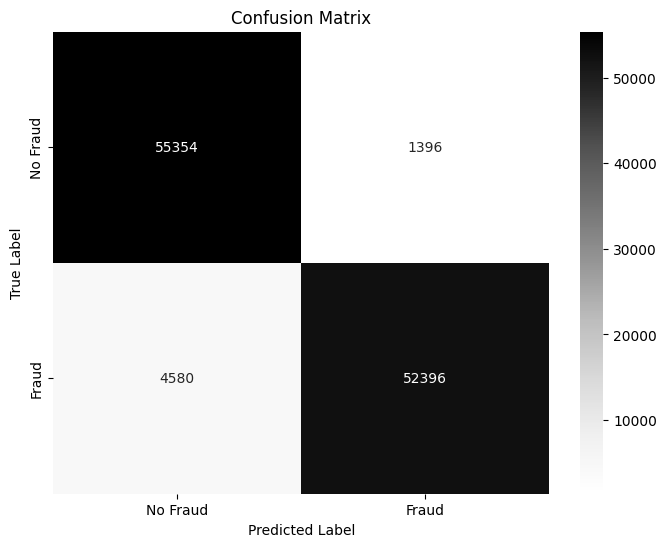

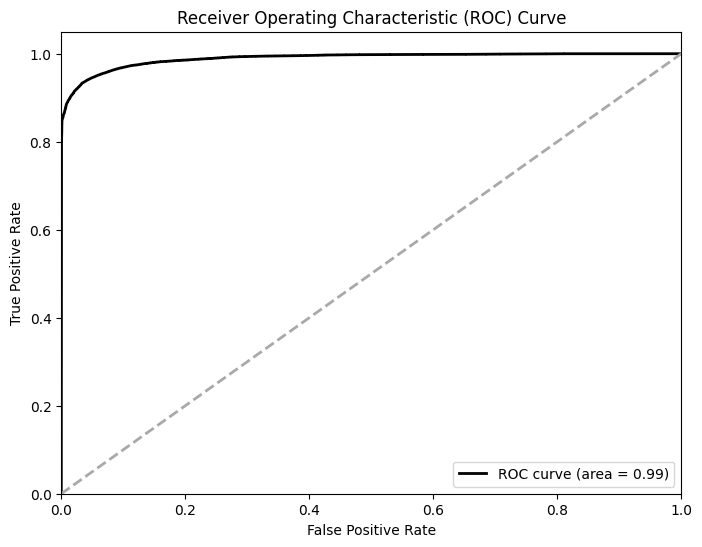

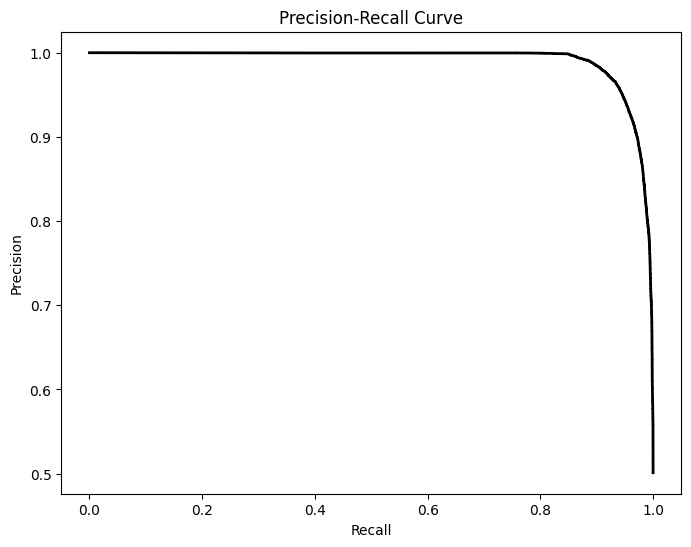

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix

# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greys', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='black', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkgray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='black', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()



In [18]:
from sklearn.model_selection import cross_val_score

# For Random Forest with parallel processing
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_scores = cross_val_score(rf_model, X, y, cv=3, scoring='accuracy')  # Using 3-fold CV for speed
print("Random Forest Cross-Validation Accuracy: ", rf_scores.mean())

# For Logistic Regression with parallel processing
lr_model = LogisticRegression(random_state=42, max_iter=1000, n_jobs=-1)
lr_scores = cross_val_score(lr_model, X, y, cv=3, scoring='accuracy')  # Using 3-fold CV for speed
print("Logistic Regression Cross-Validation Accuracy: ", lr_scores.mean())


Random Forest Cross-Validation Accuracy:  0.9993820378701557
Logistic Regression Cross-Validation Accuracy:  0.9990976338234182


In [ ]:
##Conclusion Points:
Effective Handling of Imbalanced Data: The application of SMOTE (Synthetic Minority Over-sampling Technique) significantly improved model performance by balancing the class distribution, particularly for the minority class of fraudulent transactions.

High Accuracy Achieved: Both the Random Forest and Logistic Regression models exhibited remarkable cross-validation accuracies, with Random Forest achieving 99.94% and Logistic Regression achieving 99.91%. These results demonstrate the models' strong predictive capabilities.

Robustness of Random Forest: The Random Forest model outperformed Logistic Regression slightly, likely due to its ensemble nature, which enables it to capture complex relationships in the data more effectively.

Real-world Applicability: The high accuracies attained by the models suggest their potential for real-world application in credit card fraud detection. However, further evaluation on independent test datasets and consideration of additional performance metrics (e.g., precision, recall, F1-score) are necessary for a comprehensive assessment.

Interpretability vs. Performance Trade-off: While Random Forest offers higher accuracy, Logistic Regression provides better interpretability due to its linear nature. Depending on the application requirements, stakeholders may need to balance between model interpretability and predictive performance.

Continuous Monitoring and Updates: Given the dynamic nature of fraud patterns, continuous monitoring of model performance and regular updates are essential to maintain effectiveness over time. Periodic retraining with new data and reevaluation of performance metrics are recommended practices.

Exploration of Complementary Approaches: In addition to SMOTE, exploring other techniques such as anomaly detection algorithms and feature engineering could further enhance model performance and adaptability to evolving fraud tactics.##